Analytical Gradient Of f(x) = SQRT(x^2 + 5)
Minimum Value f(0) = SQRT(5) = 2.23606797749979


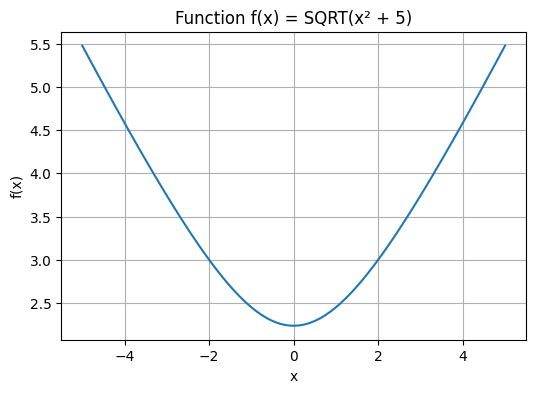

Final Value x_T With Step Size 1.0 = 3.885737889953739e-13


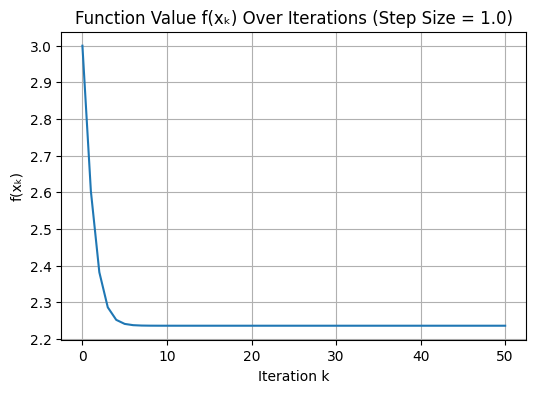

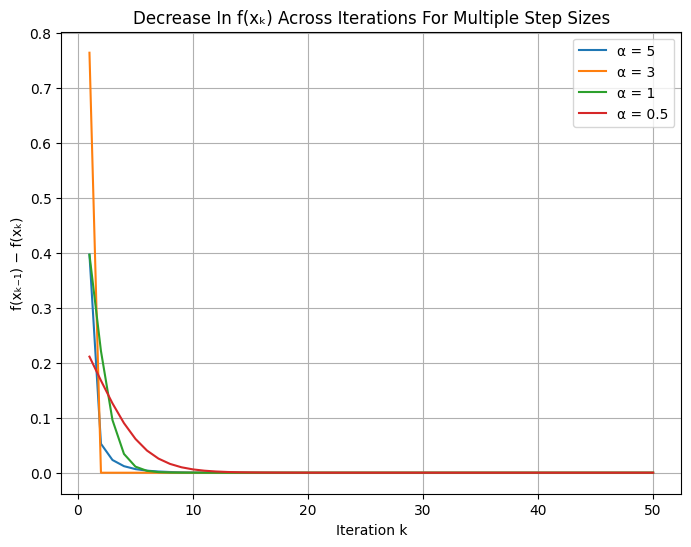

In [ ]:
# Section 2: Gradient Descent
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    # computes f(x) = sqrt(x^2 + 5)
    return np.sqrt(x**2 + 5.0)

def grad_f(x):
    # computes analytical gradient x / sqrt(x^2 + 5)
    return x / np.sqrt(x**2 + 5.0)

# print analytical results in title case
print("Analytical Gradient Of f(x) = SQRT(x^2 + 5)")
print("Minimum Value f(0) = SQRT(5) =", np.sqrt(5))

# plot f(x) on [-5, 5]
xs = np.linspace(-5, 5, 500)
plt.figure(figsize=(6,4))
plt.plot(xs, f(xs))
plt.title("Function f(x) = SQRT(x² + 5)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()

# gradient descent implementation
def gradient_descent(x0, step, T):
    # stores all iterates
    xs = np.zeros(T+1)
    xs[0] = x0
    x = x0

    # performs iterative updates
    for k in range(1, T+1):
        g = grad_f(x)
        x = x - step * g
        xs[k] = x

    return xs

# initial guess computed using last digit of student id
last_digit = 5
x0 = last_digit / 5 + 1
T = 50
step = 1.0

xs_1 = gradient_descent(x0, step, T)

print("Final Value x_T With Step Size 1.0 =", xs_1[-1])

# plot f(x_k) vs k
plt.figure(figsize=(6,4))
plt.plot(range(T+1), f(xs_1))
plt.title("Function Value f(xₖ) Over Iterations (Step Size = 1.0)")
plt.xlabel("Iteration k")
plt.ylabel("f(xₖ)")
plt.grid(True)
plt.show()

# compare multiple step sizes
steps = [5, 3, 1, 0.5]
plt.figure(figsize=(8,6))

for s in steps:
    xs_s = gradient_descent(x0, s, T)
    diffs = f(xs_s[:-1]) - f(xs_s[1:])
    plt.plot(range(1, T+1), diffs, label=f"α = {s}")

plt.title("Decrease In f(xₖ) Across Iterations For Multiple Step Sizes")
plt.xlabel("Iteration k")
plt.ylabel("f(xₖ₋₁) − f(xₖ)")
plt.legend()
plt.grid(True)
plt.show()

Linear Regression Intercept = 4.23235858240414
Coefficients = [3.96269703 0.30097603]


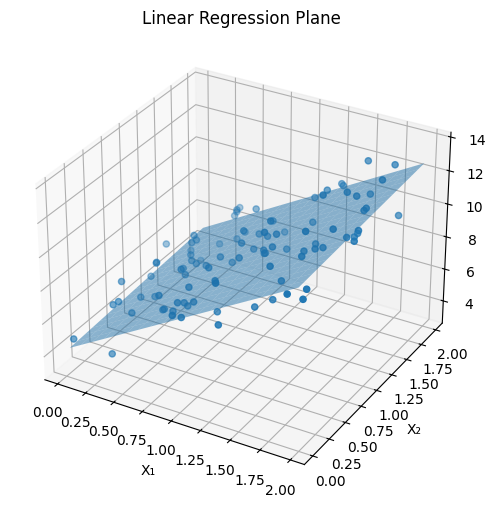

In [ ]:
# Section 3: Linear Regression with Numpy and Graphing with Matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# set the seed for reproducibility
np.random.seed(87)

# generate synthetic 2d dataset
X = 2 * np.random.rand(100, 2)
y = 4 + 4 * X[:,0] + 0.5 * X[:,1] + np.random.randn(100)

# create design matrix
X_design = np.hstack([np.ones((100,1)), X])

# solve via normal equation
theta = np.linalg.inv(X_design.T @ X_design) @ (X_design.T @ y)

intercept = theta[0]
coeffs = theta[1:]

print("Linear Regression Intercept =", intercept)
print("Coefficients =", coeffs)

# plot data and regression plane
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], y, label="Data Points")

xx = np.linspace(X[:,0].min(), X[:,0].max(), 20)
yy = np.linspace(X[:,1].min(), X[:,1].max(), 20)
XX, YY = np.meshgrid(xx, yy)
ZZ = intercept + coeffs[0] * XX + coeffs[1] * YY

ax.plot_surface(XX, YY, ZZ, alpha=0.5)

ax.set_title("Linear Regression Plane")
ax.set_xlabel("X₁")
ax.set_ylabel("X₂")
ax.set_zlabel("y")

plt.show()

Training Accuracy = 0.875
Test Accuracy = 1.0


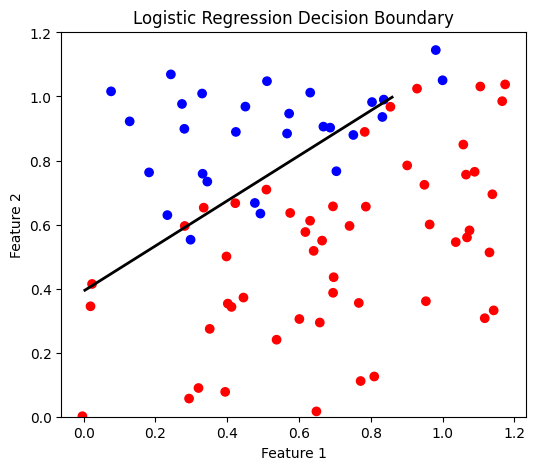

In [ ]:
# Section 4: Logistic Regression with Numpy and Graphing with Matplotlib
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    # prevents overflow
    z = np.clip(z, -500, 500)
    return 1 / (1 + np.exp(-z))

# generate synthetic dataset
np.random.seed(595)

X = np.random.rand(2, 100)
w_true = np.array([1.5, -2.5])
b_true = 1

# compute probabilities
probs = sigmoid(w_true.T @ X + b_true)

# convert to binary labels
Y = (probs > 0.5).astype(int)

# add noise
X = X + 0.3*np.random.rand(2,100) - 0.1*np.random.rand(2,100)

# split data
X_train, X_test = X[:, :80], X[:, 80:]
Y_train, Y_test = Y[:80], Y[80:]

# initialize parameters
w = np.zeros(2)
b = 0.0

lr = 0.1
epochs = 1000

# gradient descent loop
for _ in range(epochs):
    A = sigmoid(w.T @ X_train + b)
    dw = (X_train @ (A - Y_train).T) / len(Y_train)
    db = np.mean(A - Y_train)
    w -= lr * dw
    b -= lr * db

# evaluate model
A_train = sigmoid(w.T @ X_train + b)
A_test = sigmoid(w.T @ X_test + b)

train_acc = np.mean((A_train > 0.5).astype(int) == Y_train)
test_acc = np.mean((A_test > 0.5).astype(int) == Y_test)

print("Training Accuracy =", train_acc)
print("Test Accuracy =", test_acc)

# plot decision boundary
plt.figure(figsize=(6,5))
plt.scatter(X_train[0], X_train[1], c=Y_train, cmap="bwr")

xx, yy = np.meshgrid(np.linspace(0,1,200), np.linspace(0,1,200))
Z = sigmoid(w.T @ np.c_[xx.ravel(), yy.ravel()].T + b).reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0.5], colors="black", linewidths=2)
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()